In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
house = pd.read_csv(r"C:\Users\HP\Favorites\Downloads\Housing.csv")
house.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [3]:
house.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
house.shape

(545, 13)

In [6]:

# Convert categorical variables to numeric (one-hot encoding)
housing = pd.get_dummies(house, drop_first=True)

In [7]:
x = housing.drop("price" , axis=1)
y = housing["price"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(x_test)


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
matrics = {
   "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R-squared (R²)": r2
}
matrics


{'Mean Absolute Error (MAE)': 915955.886446398,
 'Mean Squared Error (MSE)': 1552389233075.0461,
 'R-squared (R²)': 0.6631280462200982}

In [14]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


Intercept: 273720.60462051164
Coefficients: [ 2.39794825e+02  7.17762862e+04  1.12406244e+06  3.86426724e+05
  2.58881334e+05  3.72650913e+05  2.70917183e+05  4.01008776e+05
  6.91330606e+05  7.68994686e+05  6.27423312e+05 -1.77801379e+05
 -4.12019553e+05]


In [15]:
# 📊 Coefficient plot
coef_house = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)
coef_house

,Feature,Coefficient
2,bathrooms,1.124062e+06
9,airconditioning_yes,7.689947e+05
8,hotwaterheating_yes,6.913306e+05
10,prefarea_yes,6.274233e+05
12,furnishingstatus_unfurnished,-4.120196e+05
7,basement_yes,4.010088e+05
3,stories,3.864267e+05
5,mainroad_yes,3.726509e+05
6,guestroom_yes,2.709172e+05
4,parking,2.588813e+05


C:\Users\HP\AppData\Local\Temp\ipykernel_3252\2241043685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_house.head(10), x="Coefficient", y="Feature", palette="coolwarm")


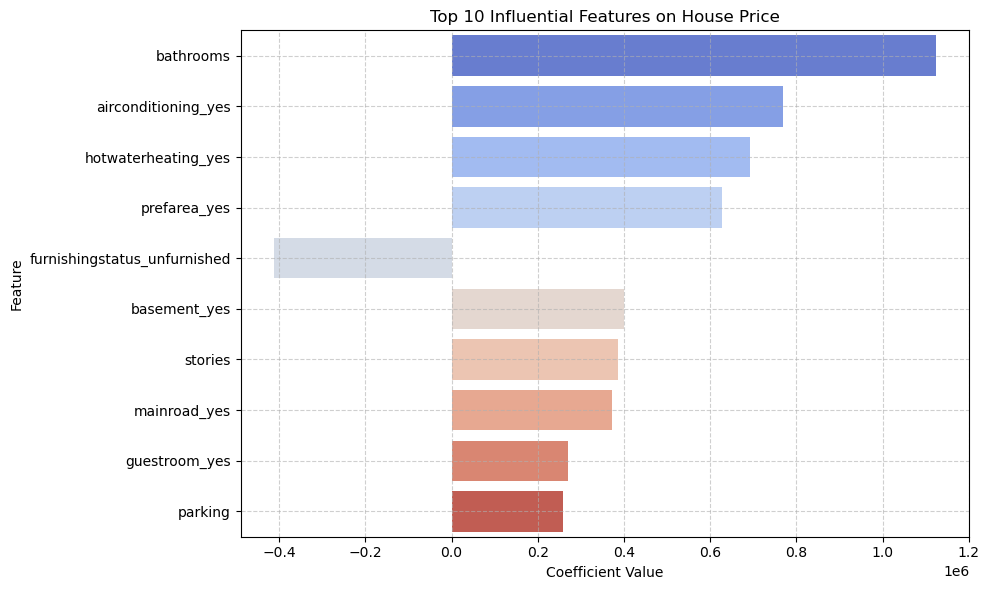

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_house.head(10), x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Top 10 Influential Features on House Price")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

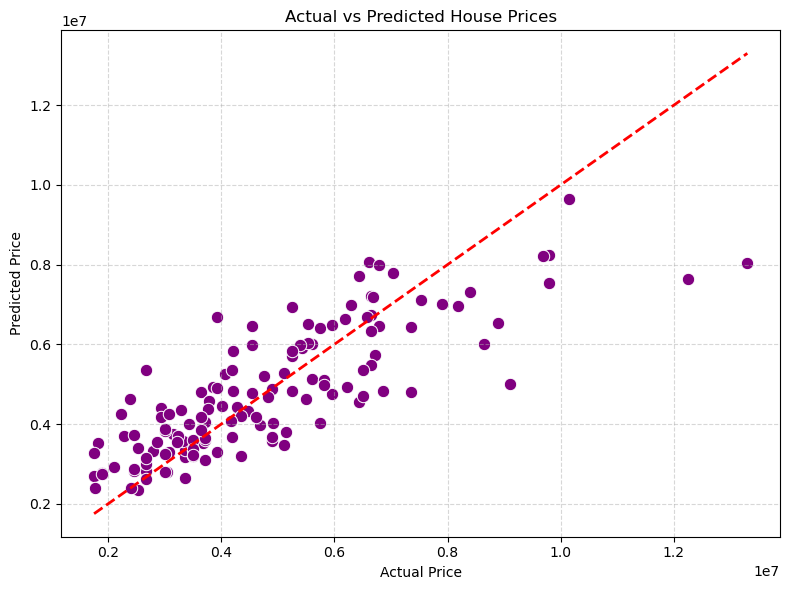

In [17]:
# 📈 Actual vs Predicted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple", edgecolor="white", s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()